In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator


In [5]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

# https://qiskit.org/textbook/ch-quantum-hardware/measurement-error-mitigation.html
def get_noise(p):
#     error_meas = pauli_error([('X',p), ('I', 1 - p)])

#     noise_model = NoiseModel()
#     # noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # measurement error is applied to measurements
#     noise_model.add_all_qubit_quantum_error(error_meas, ["x"]) # single qubit gate error is applied to x gates
    
#     print(noise_model)
#     return noise_model
    
    noise_model = NoiseModel()
    error_gate1 = pauli_error([('X',p), ('I', 1 - p)])
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"])
    return noise_model


def noisy_channel():
    noisy = QuantumCircuit(3, name = 'noisy channel')
    # simulate a noisy channel with a 1/3 chance to bit flip each qubit
    chance = 1/3
    noisy.x([0,1,2])
    return noisy

In [6]:
qc = QuantumCircuit(3, 1)
# qc.initialize([1,0,0,0,0,0,0,0])
# X|+> = |-> measure

qc.cnot(0,1)
qc.cnot(0,2)
qc.barrier()

# apply noisy channel
# compose is the new way to append circuits
qc = qc.compose(noisy_channel())

qc.barrier()
qc.cnot(0, 1)
qc.cnot(0,2)
qc.ccx(2, 1, 0)

qc.measure(0, 0)
qc.draw()

░ ┌───┐ ░           ┌───┐┌─┐
q_0: ──■────■───░─┤ X ├─░───■────■──┤ X ├┤M├
     ┌─┴─┐  │   ░ ├───┤ ░ ┌─┴─┐  │  └─┬─┘└╥┘
q_1: ┤ X ├──┼───░─┤ X ├─░─┤ X ├──┼────■───╫─
     └───┘┌─┴─┐ ░ ├───┤ ░ └───┘┌─┴─┐  │   ║ 
q_2: ─────┤ X ├─░─┤ X ├─░──────┤ X ├──■───╫─
          └───┘ ░ └───┘ ░      └───┘      ║ 
c: 1/═════════════════════════════════════╩═
                                          0

{'0': 71, '1': 9929}
1.25


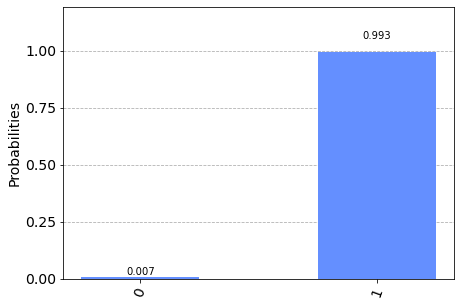

In [9]:
# run it on simulator

noise = get_noise(0.0)
sim = Aer.get_backend('aer_simulator')
sim = AerSimulator() # noise_model=noise
qobj = assemble(qc, sim, shots = 10 * 1024)
results = sim.run(qobj).result()
answer = results.get_counts()


noise = get_noise(1/20)
shots = 10000
counts = sim.run(qobj, noise_model=noise, shots=shots).result().get_counts()


print(counts)
print(1/(20**3) * shots)
plot_histogram(counts)